### Jak zapisywać modele, by wytrenować je raz, a potem na produkcji tylko ładować?

Skorzystamy z biblioteki joblib.

In [1]:
from sklearn.svm import SVC
from sklearn.model_selection import  train_test_split
from sklearn.metrics import f1_score
from sklearn.datasets import load_iris

iris_data = load_iris()
X, y = iris_data.data, iris_data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

model = SVC(C=0.1, kernel='linear', max_iter=1000)
model.fit(X_train, y_train)

SVC(C=0.1, kernel='linear', max_iter=1000)

In [2]:
y_pred = model.predict(X_test)
f1_score(y_test, y_pred, average='macro')

0.9487179487179488

In [5]:
import joblib

model_filename = 'model_svc.pkl'

joblib.dump(model, model_filename)

['model_svc.pkl']

In [7]:
model = joblib.load('model_svc.pkl')

In [8]:
model.predict(X_test)

f1_score(y_test, y_pred, average='macro')|

SVC(C=0.1, kernel='linear', max_iter=1000)

**Ciekawostka:** [Jak zrobić TO (tj. dumpować model) przy użyciu biblioteki pickle](https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/)

### Jak radzić sobie z wartościami kategorycznymi?

In [16]:
import pandas as pd

def load_dataset(filename, class_column, index_col=None):
    dataset = pd.read_csv(f'ML-datasets/{filename}.csv', index_col=index_col)
    dataset['class'] = dataset[class_column].astype('category').cat.codes
    classes = dataset.pop(class_column).unique()
    return dataset, classes

In [17]:
wine, wine_classes = load_dataset('wine', 'Class')
print(wine_classes)

y = wine.pop('class')
X = wine

['one' 'two' 'three']


In [18]:
X.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [19]:
X['Moc'] = pd.cut(X['Alcohol'], 3, labels=['słabe', 'średnie', 'mocne'], duplicates='drop')
X['Kolor'] = pd.cut(X['Color intensity'], 3, labels=['białe', 'różowe', 'czerwone'], duplicates='drop')
X['Kwas jabłkowy'] = pd.cut(X['Malic acid'], 2, labels=['tak', 'nie'], duplicates='drop')

In [20]:
X.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Moc,Kolor,Kwas jabłkowy
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,mocne,różowe,tak
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,średnie,białe,tak
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,średnie,różowe,tak
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,mocne,różowe,tak
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,średnie,białe,tak


A następnie wszystkie cechy zamieńmy na one hot vectors

In [23]:
X_dummies = pd.get_dummies(X, columns = ['Moc','Kolor','Kwas jabłkowy'], drop_first=True)

In [24]:
X_dummies

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Moc_średnie,Moc_mocne,Kolor_różowe,Kolor_czerwone,Kwas jabłkowy_nie
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0,1,1,0,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1,0,0,0,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1,0,1,0,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0,1,1,0,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,0,1,1,0,1
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,1,0,1,0,1
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,1,0,0,1,1
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,1,0,0,1,0


In [25]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse = False)

X_onehot = one_hot_encoder.fit_transform(X[['Moc','Kolor','Kwas jabłkowy']])

C:\Users\Kacper\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [26]:
X_onehot

array([[1., 0., 0., ..., 1., 0., 1.],
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 1., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 1., 0.]])

Sprawdźmy, jak radzi sobie model na tych danych

In [28]:
df = pd.concat([X,y], axis = 1)

means = df.groupby('Moc')['class'].mean()
df['Moc'] = df['Moc'].map(means)

display(df)

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Moc,Kolor,Kwas jabłkowy,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0.294118,różowe,tak,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1.116279,białe,tak,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1.116279,różowe,tak,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0.294118,różowe,tak,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1.116279,białe,tak,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,0.294118,różowe,nie,1
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,1.116279,różowe,nie,1
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,1.116279,czerwone,nie,1
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,1.116279,czerwone,tak,1


### Jak radzić sobie z niezbalansowanym zbiorem?

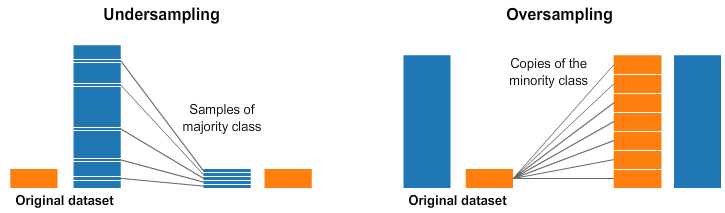

Stwórzmy syntetyczny niezbalansowany zbiór:

In [35]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=20,  weights=[0.8, 0.2], random_state=42)
df = pd.DataFrame(X, columns=[f"feat_{i}" for i in range(20)])
df['class'] = y

In [36]:
df['class'].value_counts()

0    798
1    202
Name: class, dtype: int64

Wytrenujmy na tym model SVM

#### Oversampling

In [45]:
from sklearn.utils import resample
y = df.copy()['class']
X = df.copy().drop(columns = {'class'})

In [46]:
X_rest, X_final, y_rest, y_final = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [47]:
y.value_counts()

0    798
1    202
Name: class, dtype: int64

In [53]:
df_majority = df[df['class'] == 0]
df_minority = df[df['class'] == 1]

df_minority_upsampled = resample(df_minority,
                                 replace = True,
                                 n_samples = len(df_majority))

df_upsampled = pd.concat([df_majority, df_minority_upsampled])

In [54]:
df_upsampled

,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_11,feat_12,feat_13,feat_14,feat_15,feat_16,feat_17,feat_18,feat_19,class
0,-0.669356,-0.198069,-0.870766,1.141831,0.021606,-1.086403,-1.251698,0.289305,0.357163,-0.196811,...,0.154850,-0.219970,-0.739137,1.646000,1.634606,-0.938180,-1.267337,0.261736,1.016643,0
1,0.093372,0.785848,0.105754,1.272354,-0.846316,-0.979093,1.263707,0.264020,2.411677,-0.960046,...,0.199810,0.288724,0.732492,-0.872002,-1.654887,-1.130204,-0.122709,0.693431,0.911363,0
3,-0.585793,0.572040,0.698816,0.436236,-0.315082,-0.471095,1.448820,0.505558,-1.440982,-1.134020,...,1.466783,0.678728,-1.190917,-0.893229,-0.929136,-0.221600,-0.346772,0.425658,-1.040199,0
4,1.146441,0.515579,-1.222895,-0.396230,-1.293508,-0.352428,0.071254,1.239584,1.007133,-1.479444,...,-0.918127,0.604121,1.068379,-0.882271,2.303639,-0.973379,1.259233,0.360015,1.920368,0
5,-0.699495,0.567419,-1.631335,1.105833,-1.055108,-0.538962,0.480261,0.692769,0.665369,-0.576420,...,-0.962651,0.251317,0.861437,-0.809338,-0.231301,-1.037066,1.471035,0.445686,0.652306,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
957,-0.849140,-0.218615,-0.179328,0.876760,-0.397740,0.332192,0.201785,-2.043769,-0.804138,-1.489610,...,1.338250,-0.750038,-0.620541,0.178588,0.261577,-0.221398,-0.816023,-0.212491,0.729843,1
149,1.070858,-0.201416,-0.187481,1.490144,-1.061473,0.231442,-1.204087,0.426539,1.291748,-1.187601,...,-0.965872,0.130151,-0.148555,0.244362,2.018097,0.854317,1.191235,-0.171343,-1.253000,1
514,2.423106,-1.215927,-1.059421,-0.024171,1.683972,1.404619,-0.492655,0.392907,0.400432,1.924845,...,0.587042,-1.160020,0.519437,1.467242,1.656323,-0.399028,0.047105,-1.036813,0.039462,1
332,-1.015995,-0.970765,0.584623,1.288434,0.479625,2.474499,0.237830,-0.927373,-1.055324,0.201999,...,0.231731,1.128847,-0.634275,-0.276107,-0.233607,-1.744760,-0.494965,-1.270795,0.003060,1


Sprawdźmy, czy nasz model na takim zbiorze zwróci lepsze rezultaty

In [56]:
X_train, X_test, y_train, y_test = train_test_split(df_upsampled.drop(columns = {'class'}), df_upsampled['class'], test_size=0.2, random_state=42)

In [57]:
from sklearn.metrics import classification_report
model_svm = SVC()
model_svm.fit(X_train, y_train)
y_pred = model_svm.predict(X_test)
y_pred_final = model_svm.predict(X_final)

print(classification_report(y_test, y_pred))
print(classification_report(y_final, y_pred_final))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       170
           1       0.91      0.96      0.94       150

    accuracy                           0.94       320
   macro avg       0.94      0.94      0.94       320
weighted avg       0.94      0.94      0.94       320

              precision    recall  f1-score   support

           0       0.99      0.94      0.97       160
           1       0.81      0.97      0.89        40

    accuracy                           0.95       200
   macro avg       0.90      0.96      0.93       200
weighted avg       0.96      0.95      0.95       200



#### Undersampling

Sprawdźmy, czy nasz model na takim zbiorze zwróci lepsze rezultaty